In [1]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
current_day =  now.strftime("%D")
print("Today's Date is:", current_day)
print("Current Time is :", current_time)

Today's Date is: 08/26/25
Current Time is : 00:10:26


In [2]:
pwd

'/glade/u/home/calipfleger/PWC_Paper/labmeetingnov/volcpaper_3_26/422_volc/7_25_volc'

## Plotting Parameters 

In [3]:
# Reading in Files 
filepath = '/glade/derecho/scratch/calipfleger/ilme/'

In [4]:
#Naming Parameters, Change per variable 
varplot= '\n 1258 Samalas Eruption_1x 10 Members'
variable = 'Surface Temperature Relative to 30 Year Climatology'  #' Sea Level Pressure'
unit = 'C'#'mm/day' # hPa'
plt_ylabel = 'Surface Temperature (C)'# "Total Precipitation (mm/day)" #Sea Level Pressure (hPa)"
vari = 'TS'# '/PRECT'#'/PSL'

# Plotting Parameters
months = ['-5','-4','-3','-2', '-1','0', '1', '2', '3', '4', '5']
colors = ['blue', 'black', 'red' ,'green']
colors_ribbon = ['lightblue' ,'lightgrey','mistyrose', 'lightgreen']
var_name = ['January_1x',  'April_1x', 'July_1x', 'October_1x']
var_names = ['DJF', 'MAM', 'JJA', 'SON']#, 'ANTHRO']'LULC'

In [5]:
import netCDF4
from netCDF4 import Dataset as nc
from netCDF4 import num2date

## Load in Dependencies 

In [6]:
import xarray as xr
import numpy as np
import cftime
import pandas as pd
from numpy import *
from scipy import stats
import datetime
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt #python plotting package
from matplotlib import cm
import matplotlib.colors as mcolors 
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import nctoolkit
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cpf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from collections  import namedtuple
from shapely.geometry.polygon import LinearRing
from shapely.geometry.polygon import Polygon

In [7]:

# Define regions
regbox = [-5, 5, 190, 240]  # NINO3.4 region of interest I

## Create vartiables to plot pwc timeseries

# Read in Files 

In [8]:
## Make geom for Nino 3.4 index Box
Wlats = [-5, -5, 5, 5]
Wlons = [-240, -190, -190, -240]
Wring = LinearRing(list(zip(Wlons, Wlats)))

In [9]:
filepath = '/glade/derecho/scratch/calipfleger/ilme/'
basedir = '/glade/campaign/cesm/collections/cesmLME/CESM-CAM5-LME/atm/proc/tseries/monthly/'
basedir_ocn = '/glade/derecho/scratch/samantha/iLME_seasvolc/CESM-CAM5-LME/atm/proc/tseries/monthly/'
file_prefix= '.cam.h0.' 
i_model = '/b.ie12.B1850C5CN.f19_g16.LME.' ## read in 2&3 iLME Ensembles 
i_model1 = '/b.ie12.B1850CN.f19_g16.' ## read in iLME ens 1
model = '/b.e11.BLMTRC5CN.f19_g16.'

In [10]:
# CESM converting month 01 to January 
from itertools import product
from cftime import DatetimeNoLeap

dates_sam = [DatetimeNoLeap(year, month, 1) for year, month in product(range(1250, 1265), range(1, 13))]
da_sam = xr.DataArray(np.arange(180), coords=[dates_sam], dims=['time'], name='time')

years_cntl= np.linspace(0,348, 360) 
dates_cntl = [DatetimeNoLeap(years_cntl, month, 1) for years_cntl, month in product(range(1228, 1258), range(1, 13))]
da_cntl =xr.DataArray(np.arange(360), coords=[dates_cntl], dims=['time'], name='time')

In [11]:
def xrdf(x,v,f):
    xrda = ((xr.concat(x, dim='member')))#.assign_coords({'time':(da.time)}))
    xrda.to_netcdf(filepath+v + f +'.nc')#create ensemble dimension after reading in all the ensemble members
    return xrda

In [12]:
%%time
var = 'TS'
forcing ='_sam_volc'
file_suffix= '.125001-129412.nc' #Tambora eruption 

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


In [13]:
basedir_sam = '/glade/derecho/scratch/samantha/LME_seasvolc/TS/'
file_suffix2 = '.125001-126912.nc'

In [14]:
ens = 'JanSamalas.1x.' #VOLC forcing ensemble 
ens2 = "VOLC_GRA."
file_prefix2 = '.jan_samalas.cam.h0.'
ds = []# initialise array:
for member in tqdm(range(1,5 +1)):
    id = str(member)
    file = id+file_prefix+var+ file_suffix
    member = xr.open_dataset(basedir_ocn + var+ i_model+ ens + '00'+file).sel(time = slice('1250-02-01','1265-01-01')).TS.squeeze()
    ds.append(member)
    file2 = id+file_prefix2+var+ file_suffix2
    member = xr.open_dataset(basedir_sam + model+ ens2 + '00'+file2).sel(time = slice('1250-02-01','1265-01-01')).TS.squeeze()
    ds.append(member)
    
jan = xrdf(ds, var,forcing).assign_coords({'time':(da_sam.time)}).sel(time = slice('1255-12-01','1264-02-01')) - 273.5 

100%|██████████| 5/5 [00:01<00:00,  2.90it/s]


In [15]:
ens = 'AprSamalas.1x.' #VOLC forcing ensemble 
ds = []# initialise array:
for member in tqdm(range(1,5 +1)):
    id = str(member)
    file = id+file_prefix+var+ file_suffix
    member = xr.open_dataset(basedir_ocn + var+ i_model+ ens + '00'+file).sel(time = slice('1250-02-01','1265-01-01')).TS.squeeze()
    ds.append(member)
apr = xrdf(ds, var,forcing).assign_coords({'time':(da_sam.time)}).sel(time = slice('1255-12-01','1264-02-01')) - 273.5 

100%|██████████| 5/5 [00:00<00:00, 87.81it/s]


In [16]:
ens = 'JulSamalas.1x.' #VOLC forcing ensemble 
ens2 = "VOLC_GRA."
file_prefix2 = '.jul_samalas.cam.h0.'
ds = []# initialise array:
for member in tqdm(range(1,5 +1)):
    id = str(member)
    file = id+file_prefix+var+ file_suffix
    member = xr.open_dataset(basedir_ocn + var+ i_model+ ens + '00'+file).sel(time = slice('1250-02-01','1265-01-01')).TS.squeeze()
    ds.append(member)
    file2 = id+file_prefix2+var+ file_suffix2
    member = xr.open_dataset(basedir_sam + model+ ens2 + '00'+file2).sel(time = slice('1250-02-01','1265-01-01')).TS.squeeze()
    ds.append(member)
jul = xrdf(ds, var,forcing).assign_coords({'time':(da_sam.time)}).sel(time = slice('1255-12-01','1264-02-01')) - 273.5 

100%|██████████| 5/5 [00:00<00:00, 28.21it/s]


In [17]:
ens = 'OctSamalas.1x.' #VOLC forcing ensemble 
ens2 = "VOLC_GRA."
file_prefix2 = '.oct_samalas.cam.h0.'
ds = []# initialise array:
for member in tqdm(range(1,5 +1)):
    id = str(member)
    file = id+file_prefix+var+ file_suffix
    member = xr.open_dataset(basedir_ocn + var+ i_model+ ens + '00'+file).sel(time = slice('1250-02-01','1265-01-01')).TS.squeeze()
    ds.append(member)
    file2 = id+file_prefix2+var+ file_suffix2
    member = xr.open_dataset(basedir_sam + model+ ens2 + '00'+file2).sel(time = slice('1250-02-01','1265-01-01')).TS.squeeze()
    ds.append(member)
oct= xrdf(ds, var,forcing).assign_coords({'time':(da_sam.time)}).sel(time = slice('1255-12-01','1264-02-01')) - 273.5 

100%|██████████| 5/5 [00:00<00:00, 35.30it/s]


In [18]:
basedir_atm = '/glade/campaign/cesm/collections/cesmLME/CESM-CAM5-LME/atm/proc/tseries/monthly/'
file_prefix= '.cam.h0.' 
i_model = '/b.ie12.B1850C5CN.f19_g16.LME.' ## read in 2&3 iLME Ensembles 
i_model1 = '/b.ie12.B1850CN.f19_g16.' ## read in iLME ens 1
model = '/b.e11.BLMTRC5CN.f19_g16.'

In [19]:
%%time
ens = 'VOLC_GRA.' #Full forcing ensemble 
file_suffix= '.085001-184912.nc'
ds = []# initialise array:
for member in tqdm(range(1,5+1)):
    id = str(member)
    file = id+file_prefix+var+ file_suffix
    member = xr.open_dataset(basedir_atm + var+ model+ ens + '00'+file).sel(lat=slice(-35,35),lon=slice(75,290)).sel(time = slice('1228-02-01','1258-01-01')).TS.squeeze()
    ds.append(member)
var_cntl= xrdf(ds, var,forcing).assign_coords({'time':(da_cntl.time)}).sel(time = slice('1228-01-01','1257-12-01')) - 273.5 

100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


CPU times: user 1.26 s, sys: 299 ms, total: 1.56 s
Wall time: 7.33 s


In [20]:
 # Compute climatology and anomalies
def anom_clim(datavar, climatology):
    print("Computing anomalies.")
    clim = climatology.groupby('time.month').mean('time')
    clim_avg = clim.mean('member')
    clim_anom = datavar.groupby('time.month') - clim_avg
    return clim_anom

In [21]:
jananom = anom_clim(jan,var_cntl)
apranom = anom_clim(apr,var_cntl)
julyanom = anom_clim(jul,var_cntl)
octanom = anom_clim(oct,var_cntl)
anom_list =  [jananom, apranom, julyanom, octanom]

Computing anomalies.
Computing anomalies.
Computing anomalies.
Computing anomalies.


In [76]:
jananom

<xarray.DataArray 'TS' (member: 10, time: 99, lat: 36, lon: 87)>
array([[[[ 3.58070374e-01,  4.41785812e-01,  5.04398346e-01, ...,
           1.05356216e-01,  1.02718353e-01,  2.55868912e-01],
         [ 7.20447540e-01,  7.99615860e-01,  8.40587616e-01, ...,
           1.06496811e-01,  9.06066895e-02,  1.08223152e+00],
         [ 1.22250938e+00,  1.25378036e+00,  1.28319740e+00, ...,
           1.92361832e-01,  2.49111176e-01,  4.44877625e-01],
         ...,
         [-1.92591095e+00, -9.61247444e-01, -7.08807945e-01, ...,
           1.46678925e-01,  2.77835846e-01,  3.97140503e-01],
         [-1.27407837e+00, -1.16769660e+00,  1.78446960e+00, ...,
          -9.53407288e-02, -8.41007233e-02,  9.91268158e-02],
         [-1.38479447e+00, -7.89852142e-01,  3.90845871e+00, ...,
          -2.53055573e-01, -3.65865707e-01, -1.96025848e-01]],

        [[-3.98830414e-01, -3.44493866e-01, -3.53149414e-01, ...,
          -1.95089340e-01, -1.72069550e-01,  1.33509445e+00],
         [-2.66576767e-01, -1.75022125e-01, -6.25858307e-02, ...,
          -1.56925201e-01, -2.52258301e-01,  1.98210526e+00],
         [ 2.36816406e-01,  3.65535736e-01,  5.35160065e-01, ...,
           4.74567413e-02, -8.23516846e-02,  1.74719048e+00],
...
          -8.96034241e-02, -6.30474091e-02, -1.64175034e-01],
         [-1.31383896e-01, -1.13626647e+00, -2.19564438e+00, ...,
          -1.17528915e-01, -7.45544434e-02, -7.01599121e-02],
         [-8.18068027e-01, -4.06524277e+00, -2.75315475e+00, ...,
          -1.37321472e-01, -1.35028839e-01, -8.64810944e-02]],

        [[-2.28542328e-01, -2.20510483e-01, -1.33846283e-01, ...,
          -1.12180710e-01, -2.10342407e-01,  3.64950180e-01],
         [ 1.69580460e-01,  2.40123749e-01,  2.93846130e-01, ...,
           4.54006195e-02, -1.24126434e-01,  1.26200867e+00],
         [ 5.56987762e-01,  5.98827362e-01,  6.05440140e-01, ...,
           2.13731766e-01,  2.55756378e-01,  8.19431305e-01],
         ...,
         [ 3.60542297e-01, -8.67519379e-02, -3.04959297e-01, ...,
          -2.94719696e-01, -2.46204376e-01, -2.64358521e-01],
         [ 1.39631271e-01, -1.43524766e-01, -3.19122314e-01, ...,
          -2.89281845e-01, -2.74410248e-01, -2.14588165e-01],
         [-3.46229970e-02, -6.90917969e-01,  3.61291885e-01, ...,
          -3.05461884e-01, -3.23858261e-01, -2.54568100e-01]]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -33.16 -31.26 -29.37 -27.47 ... 29.37 31.26 33.16
  * lon      (lon) float64 75.0 77.5 80.0 82.5 85.0 ... 282.5 285.0 287.5 290.0
  * time     (time) object 1255-12-01 00:00:00 ... 1264-02-01 00:00:00
    month    (time) int64 12 1 2 3 4 5 6 7 8 9 10 ... 4 5 6 7 8 9 10 11 12 1 2
Dimensions without coordinates: member

In [22]:
def calculate_nino34(data):
    """Calculate NINO3.4 index from temperature data"""
    nino34 = data.sel(lat=slice(-5, 5), lon=slice(190, 240))
    weights = np.cos(np.deg2rad(nino34.lat))
    nino34_avg = nino34.weighted(weights).mean(dim=['lat', 'lon'])
    return nino34_avg 

In [23]:
jan_nino34 = calculate_nino34(jananom)
apr_nino34 = calculate_nino34(apranom)
july_nino34 = calculate_nino34(julyanom)
oct_nino34 = calculate_nino34(octanom)
cntl_nino34 = calculate_nino34(var_cntl)

In [24]:
nino34_list = [jan_nino34, apr_nino34, july_nino34, oct_nino34]

In [25]:
def reg_avg(r):
    ds = []
    for i in range(len(r)):
        reg_box = r[i].sel(lat=slice(-5,5), lon=slice(190,240))  
        avg_region = reg_box.mean(('lat', 'lon'))
        ds.append(avg_region)
    return ds[:]

In [26]:
def season_nino34(m):
  DA_DJF = m.sel(time=m.time.dt.season=="DJF")
  DA_JJA = m.sel(time=m.time.dt.season=="JJA")
  return DA_DJF, DA_JJA

In [27]:
djf34ja, jja34ja = season_nino34(jan_nino34)
djf34a, jja34a = season_nino34(apr_nino34)
djf34ju, jja34ju = season_nino34(july_nino34)
djf34o, jja34o = season_nino34(oct_nino34)

In [28]:
## Get the lengths of lat, lon and time
nlon=len(var_cntl.lon)
nlat=len(var_cntl.lat)
ntime=len(var_cntl.time)
ntime_post = len(var_cntl.time)
time = var_cntl.time
lon = var_cntl.lon
lat = var_cntl.lat
post_time = var_cntl.time
tlen = len(var_cntl[0])
tlen_post = len(var_cntl[0])

In [29]:
#Utility functions for visualising annual NINO3.4 distributions."""

import math
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
from matplotlib.lines import Line2D


MONTH_COLORS = {
    "January": "tab:blue",
    "April": "tab:brown",
    "July": "tab:red",
    "October": "tab:green",
}


def plot_yearly_kde_panel(
    jan_nino34: xr.DataArray,
    apr_nino34: xr.DataArray,
    july_nino34: xr.DataArray,
    oct_nino34: xr.DataArray,
    eruption_year: int = 1258,
) -> plt.Figure:
    """Plot annual KDEs for four start-month ensembles.

    One subplot is created for each year relative to ``eruption_year``
    (from Y-1 through Y+6). Within each subplot the annual mean NINO3.4
    anomaly distributions of the January, April, July, and October start
    months are shown as four KDE curves.

    Parameters
    ----------
    jan_nino34, apr_nino34, july_nino34, oct_nino34 : xarray.DataArray
        NINO3.4 anomaly ensembles with dimensions ``(member, time)``.
    eruption_year : int, optional
        Reference year for the eruption (default 1258).

    Returns
    -------
    matplotlib.figure.Figure
        The resulting panel figure.
    """

    start_months = OrderedDict(
        (
            ("January", jan_nino34),
            ("April", apr_nino34),
            ("July", july_nino34),
            ("October", oct_nino34),
        )
    )

    years = OrderedDict(
        (
            ("Y -1", eruption_year - 1),
            ("Y 0", eruption_year),
            ("Y +1", eruption_year + 1),
            ("Y +2", eruption_year + 2),
            ("Y +3", eruption_year + 3),
            ("Y +4", eruption_year + 4),
            ("Y +5", eruption_year + 5),
            ("Y +6", eruption_year + 6),
        )
    )

    n_years = len(years)
    ncols = 4
    nrows = math.ceil(n_years / ncols)
    fig, axes = plt.subplots(
        nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharex=True, sharey=True
    )
    axes = axes.ravel()

    for ax, (yr_label, yr_val) in zip(axes, years.items()):
        for month_label, da in start_months.items():
            annual = da.where(da.time.dt.year == yr_val, drop=True)
            annual = annual.mean(dim="time").values
            if len(annual) == 0 or np.allclose(annual, annual[0]):
                continue
            sns.kdeplot(
                annual,
                ax=ax,
                color=MONTH_COLORS[month_label],
                label=month_label,
                warn_singular=False,
            )
        ax.axvline(0, color="black", alpha=0.3)
        ax.axvline(0.5, color="red", linestyle=":", alpha=0.5)
        ax.axvline(-0.5, color="blue", linestyle=":", alpha=0.5)
        ax.set_title(yr_label)
        ax.set_xlim([-5, 5])
        ax.set_ylim([0, 1.75])

    # Hide any unused axes
    for ax in axes[n_years:]:
        ax.set_visible(False)

    handles = [
        Line2D([0], [0], color=MONTH_COLORS[label], lw=2, label=label)
        for label in start_months
    ]
    fig.legend(
        handles=handles,
        loc="upper center",
        ncol=len(start_months),
        title="Start Month",
        bbox_to_anchor=(0.5, 0.98),
    )
    fig.text(0.5, 0.04, "NINO3.4 Anomaly (°C)", ha="center")
    fig.text(0.04, 0.5, "Probability Density", va="center", rotation="vertical")
    fig.tight_layout(rect=[0, 0.05, 1, 0.95])
    return fig

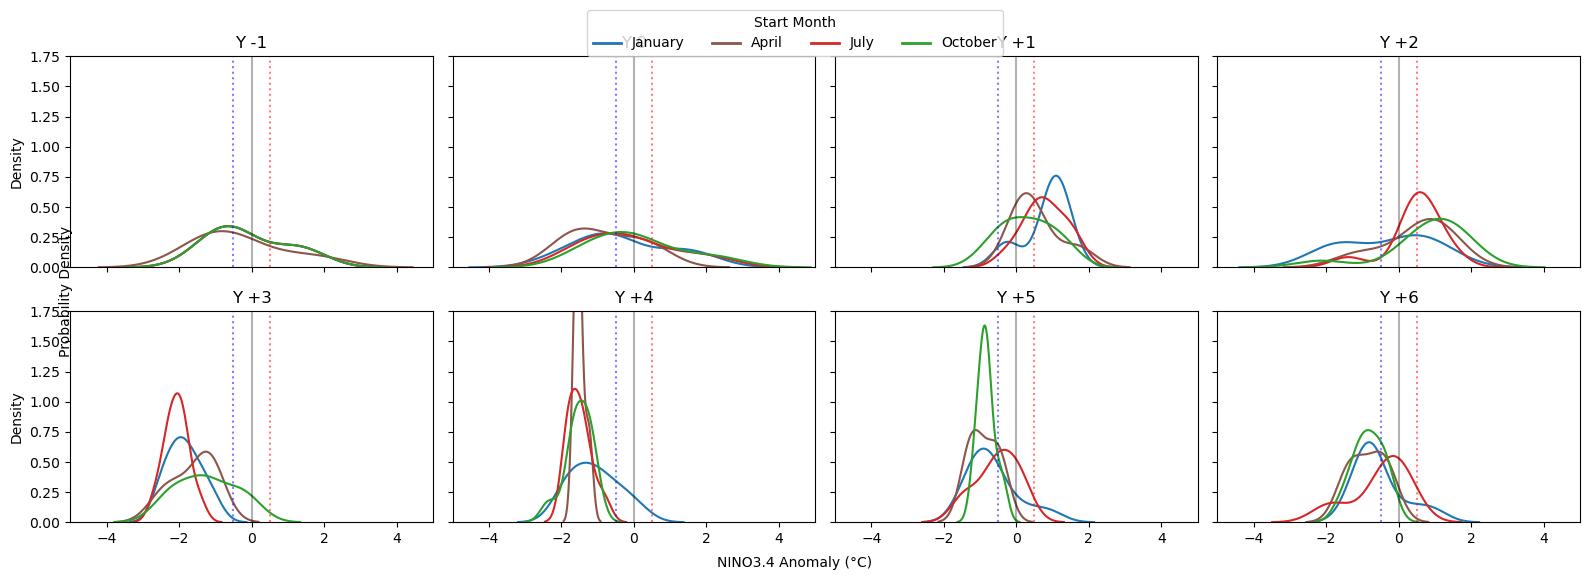

In [30]:
fig = plot_yearly_kde_panel(
    jan_nino34, apr_nino34, july_nino34, oct_nino34, eruption_year=1258
)
plt.show() 

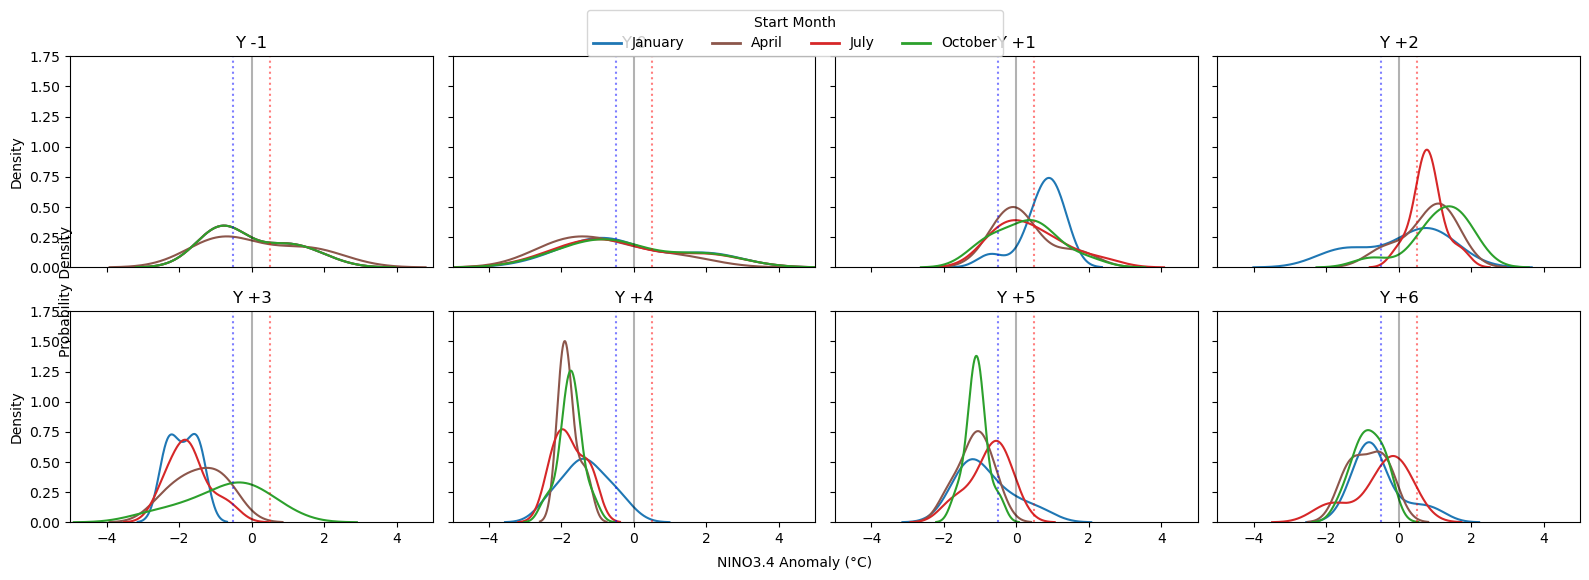

In [31]:
fig = plot_yearly_kde_panel(
    djf34ja, djf34a, djf34ju, djf34o, eruption_year=1258
)
plt.show() 

In [32]:
import math
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from matplotlib.lines import Line2D


MONTH_COLORS = {
    "January": "tab:blue",
    "April": "tab:orange",
    "July": "tab:green",
    "October": "tab:red",
}


def plot_yearly_kde_panel(
    jan_nino34: xr.DataArray,
    apr_nino34: xr.DataArray,
    july_nino34: xr.DataArray,
    oct_nino34: xr.DataArray,
    eruption_year: int = 1258,
) -> plt.Figure:
    """Plot annual KDEs for four start-month ensembles.

    One subplot is created for each year relative to ``eruption_year``
    (from Y-1 through Y+6). Within each subplot the annual mean NINO3.4
    anomaly distributions of the January, April, July, and October start
    months are shown as four KDE curves.

    Parameters
    ----------
    jan_nino34, apr_nino34, july_nino34, oct_nino34 : xarray.DataArray
        NINO3.4 anomaly ensembles with dimensions ``(member, time)``.
    eruption_year : int, optional
        Reference year for the eruption (default 1258).

    Returns
    -------
    matplotlib.figure.Figure
        The resulting panel figure.
    """

    start_months = OrderedDict(
        (
            ("January", jan_nino34),
            ("April", apr_nino34),
            ("July", july_nino34),
            ("October", oct_nino34),
        )
    )

    years = OrderedDict(
        (
            ("Y -1", eruption_year - 1),
            ("Y 0", eruption_year),
            ("Y +1", eruption_year + 1),
            ("Y +2", eruption_year + 2),
            ("Y +3", eruption_year + 3),
            ("Y +4", eruption_year + 4),
            ("Y +5", eruption_year + 5),
            ("Y +6", eruption_year + 6),
        )
    )

    n_years = len(years)
    ncols = 4
    nrows = math.ceil(n_years / ncols)
    fig, axes = plt.subplots(
        nrows, ncols, figsize=(4 * ncols, 3 * nrows), sharex=True, sharey=True
    )
    axes = axes.ravel()

    # collect data for caption statistics
    stats = {month: [] for month in start_months}

    for ax, (yr_label, yr_val) in zip(axes, years.items()):
        for month_label, da in start_months.items():
            annual = da.where(da.time.dt.year == yr_val, drop=True)
            annual = annual.mean(dim="time").values
            if len(annual) == 0 or np.allclose(annual, annual[0]):
                continue
            stats[month_label].extend(annual.tolist())
            sns.kdeplot(
                annual,
                ax=ax,
                color=MONTH_COLORS[month_label],
                label=month_label,
                warn_singular=False,
            )
        ax.axvline(0, color="black", alpha=0.3)
        ax.axvline(0.5, color="red", linestyle=":", alpha=0.5)
        ax.axvline(-0.5, color="blue", linestyle=":", alpha=0.5)
        ax.set_title(yr_label)
        ax.set_xlim([-5, 5])
        ax.set_ylim([0, 1.75])

    # Hide any unused axes
    for ax in axes[n_years:]:
        ax.set_visible(False)

    handles = [
        Line2D([0], [0], color=MONTH_COLORS[label], lw=2, label=label)
        for label in start_months
    ]
    fig.legend(
        handles=handles,
        loc="upper center",
        ncol=len(start_months),
        title="Start Month",
        bbox_to_anchor=(0.5, 0.92),
    )

    fig.text(0.5, 0.04, "NINO3.4 Anomaly (°C)", ha="center")
    fig.text(0.04, 0.5, "Probability Density", va="center", rotation="vertical")

    # dynamic title
    fig.suptitle(
        f"Annual NINO3.4 Distributions Relative to {eruption_year}", y=0.97
    )

    # caption with summary statistics
    records = [
        {"Month": m, "Anomaly": val}
        for m, vals in stats.items()
        for val in vals
    ]
    if records:
        summary = (
            pd.DataFrame.from_records(records)
            .groupby("Month")
            .agg(["mean", "std"])
        )
        caption_parts = [
            f"{m}: {row['Anomaly']['mean']:.2f}±{row['Anomaly']['std']:.2f}°C"
            for m, row in summary.iterrows()
        ]
        caption = "; ".join(caption_parts)
        fig.text(0.5, 0.005, caption, ha="center", va="bottom", fontsize=8)

    fig.tight_layout(rect=[0, 0.06, 1, 0.90])
    return fig

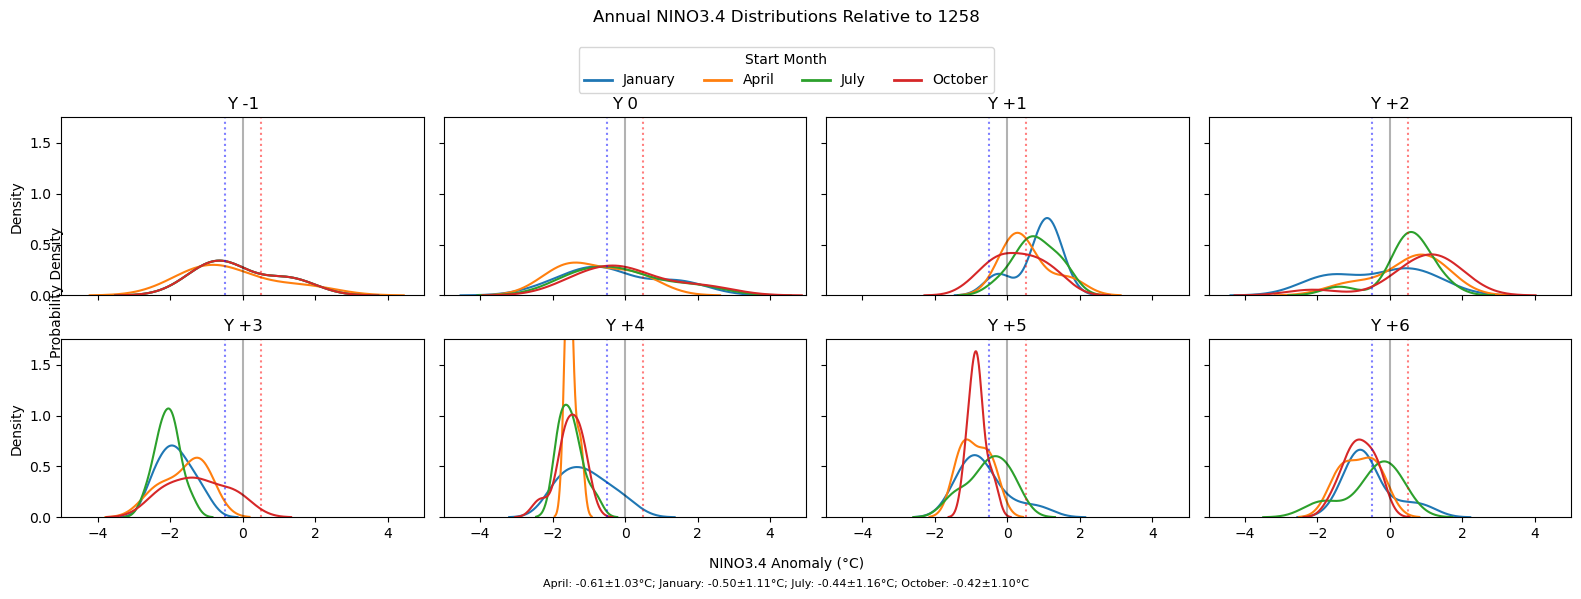

In [33]:
fig = plot_yearly_kde_panel(
    jan_nino34, apr_nino34, july_nino34, oct_nino34, eruption_year=1258
)
plt.show() 

In [34]:
import math
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from matplotlib.lines import Line2D


MONTH_COLORS = {
    "January": "tab:blue",
    "April": "tab:orange",
    "July": "tab:green",
    "October": "tab:red",
}

sns.set_style("whitegrid")


def plot_yearly_kde_panel(
    jan_nino34: xr.DataArray,
    apr_nino34: xr.DataArray,
    july_nino34: xr.DataArray,
    oct_nino34: xr.DataArray,
    eruption_year: int = 1258,
) -> plt.Figure:
    """Plot annual KDEs for four start-month ensembles.

    One subplot is created for each year relative to ``eruption_year``
    (from Y-1 through Y+6). Within each subplot the annual mean NINO3.4
    anomaly distributions of the January, April, July, and October start
    months are shown as four KDE curves. Each panel title lists the number
    of contributing members and a caption summarises per-year ensemble
    statistics (mean ± standard deviation).

    Parameters
    ----------
    jan_nino34, apr_nino34, july_nino34, oct_nino34 : xarray.DataArray
        NINO3.4 anomaly ensembles with dimensions ``(member, time)``.
    eruption_year : int, optional
        Reference year for the eruption (default 1258).

    Returns
    -------
    matplotlib.figure.Figure
        The resulting panel figure.
    """

    start_months = OrderedDict(
        (
            ("January", jan_nino34),
            ("April", apr_nino34),
            ("July", july_nino34),
            ("October", oct_nino34),
        )
    )

    years = OrderedDict(
        (
            ("Y -1", eruption_year - 1),
            ("Y 0", eruption_year),
            ("Y +1", eruption_year + 1),
            ("Y +2", eruption_year + 2),
            ("Y +3", eruption_year + 3),
            ("Y +4", eruption_year + 4),
            ("Y +5", eruption_year + 5),
            ("Y +6", eruption_year + 6),
        )
    )

    n_years = len(years)
    ncols = 4
    nrows = math.ceil(n_years / ncols)
    fig, axes = plt.subplots(
        nrows, ncols, figsize=(4.5 * ncols, 3.2 * nrows), sharex=True, sharey=True
    )
    axes = axes.ravel()

    year_stats: dict[str, dict[str, float]] = {}

    for ax, (yr_label, yr_val) in zip(axes, years.items()):
        year_vals: list[float] = []
        for month_label, da in start_months.items():
            annual = da.where(da.time.dt.year == yr_val, drop=True)
            annual = annual.mean(dim="time").values
            if len(annual) == 0 or np.allclose(annual, annual[0]):
                continue
            year_vals.extend(annual.tolist())
            sns.kdeplot(
                annual,
                ax=ax,
                color=MONTH_COLORS[month_label],
                label=month_label,
                warn_singular=False,
            )
        ax.axvline(0, color="black", alpha=0.3)
        ax.axvline(0.5, color="red", linestyle=":", alpha=0.5)
        ax.axvline(-0.5, color="blue", linestyle=":", alpha=0.5)
        if year_vals:
            year_stats[yr_label] = {
                "n": len(year_vals),
                "mean": float(np.mean(year_vals)),
                "std": float(np.std(year_vals, ddof=1)),
            }
            ax.set_title(f"{yr_label}\n(n={len(year_vals)})")
        else:
            ax.set_title(yr_label)
        ax.set_xlim([-5, 5])
        ax.set_ylim([0, 1.75])

    # Hide any unused axes
    for ax in axes[n_years:]:
        ax.set_visible(False)

    handles = [
        Line2D([0], [0], color=MONTH_COLORS[label], lw=2, label=label)
        for label in start_months
    ]
    fig.legend(
        handles=handles,
        loc="upper center",
        ncol=len(start_months),
        title="Start Month",
        bbox_to_anchor=(0.5, 0.93),
    )

    fig.text(0.5, 0.04, "NINO3.4 Anomaly (°C)", ha="center")
    fig.text(0.04, 0.5, "Probability Density", va="center", rotation="vertical")

    # dynamic title
    fig.suptitle(
        f"Annual NINO3.4 Distributions Relative to {eruption_year}", y=0.98
    )

    # caption with per-year member statistics
    if year_stats:
        caption_parts = [
            f"{yr}: {s['mean']:.2f}±{s['std']:.2f}°C (n={s['n']})"
            for yr, s in year_stats.items()
        ]
        caption = "; ".join(caption_parts)
        fig.text(0.5, 0.005, caption, ha="center", va="bottom", fontsize=8)

    fig.tight_layout(rect=[0, 0.07, 1, 0.92])
    return fig

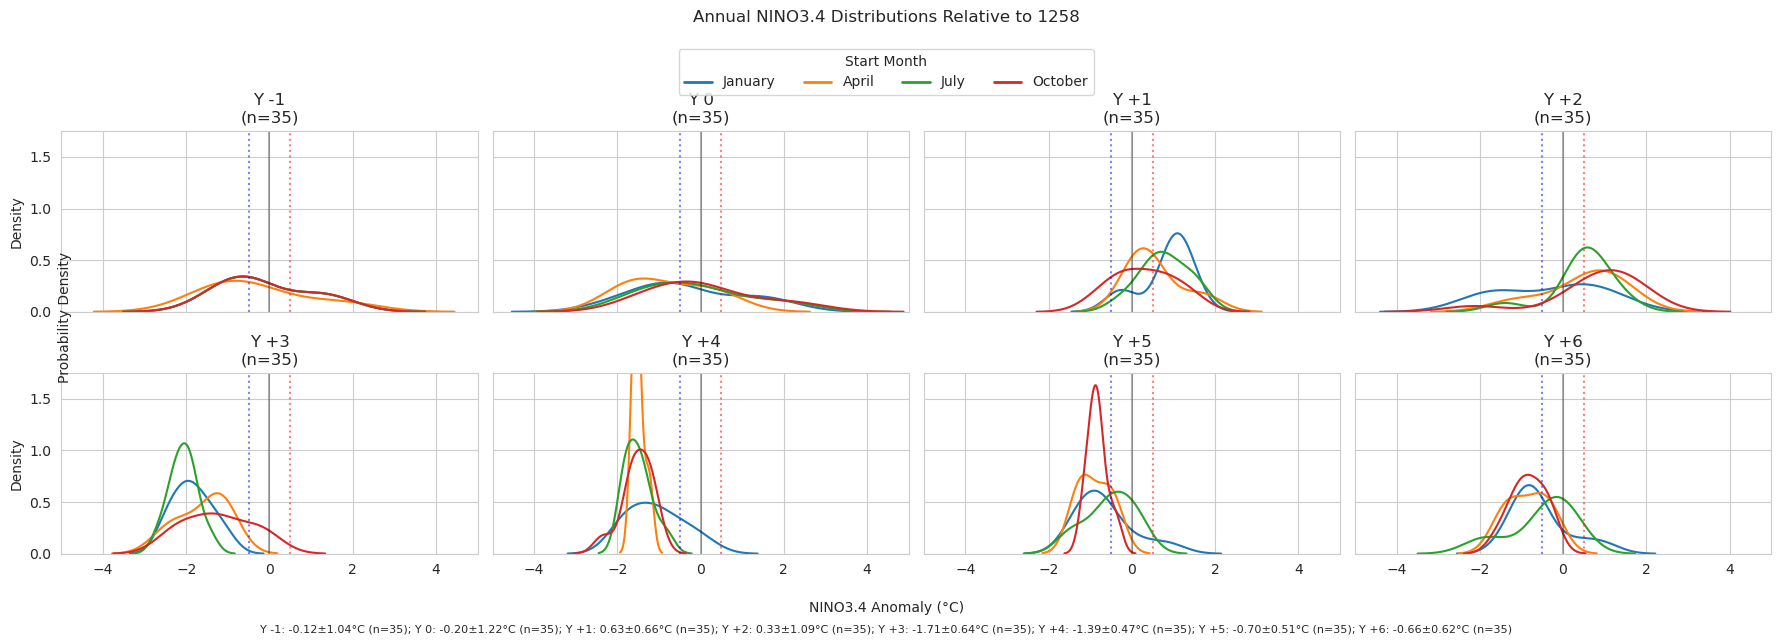

In [35]:
fig = plot_yearly_kde_panel(
    jan_nino34, apr_nino34, july_nino34, oct_nino34, eruption_year=1258
)
plt.show() 

In [64]:
import math
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
from matplotlib.lines import Line2D
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests


MONTH_COLORS = {
    "January": "tab:blue",
    "April": "tab:orange",
    "July": "tab:green",
    "October": "tab:red",
}

sns.set_style("whitegrid")


def _p_to_star(p: float) -> str:
    if p < 0.001:
        return "***"
    if p < 0.01:
        return "**"
    if p < 0.05:
        return "*"
    return ""


def plot_yearly_kde_panel(
    jan_nino34: xr.DataArray,
    apr_nino34: xr.DataArray,
    july_nino34: xr.DataArray,
    oct_nino34: xr.DataArray,
    eruption_year: int = 1258,
) -> plt.Figure:
    """Plot DJF-season KDEs for four start-month ensembles.

    One subplot is created for each year relative to ``eruption_year``
    (from Y-1 through Y+6). Within each subplot the December–February mean
    NINO3.4 anomaly distributions of the January, April, July, and October start
    months are shown as four KDE curves. Each panel title lists the number
    of contributing members and a caption summarises per-year ensemble
    statistics (mean ± standard deviation).

    Parameters
    ----------
    jan_nino34, apr_nino34, july_nino34, oct_nino34 : xarray.DataArray
        NINO3.4 anomaly ensembles with dimensions ``(member, time)``.
    eruption_year : int, optional
        Reference year for the eruption (default 1258).

    Returns
    -------
    matplotlib.figure.Figure
        The resulting panel figure.
    """

    start_months = OrderedDict(
        (
            ("January", jan_nino34),
            ("April", apr_nino34),
            ("July", july_nino34),
            ("October", oct_nino34),
        )
    )

    years = OrderedDict(
        (
            ("Y -1", eruption_year - 1),
            ("Y 0", eruption_year),
            ("Y +1", eruption_year + 1),
            ("Y +2", eruption_year + 2),
            ("Y +3", eruption_year + 3),
            ("Y +4", eruption_year + 4),
            ("Y +5", eruption_year + 5),
            ("Y +6", eruption_year + 6),
        )
    )

    n_years = len(years)
    ncols = 4
    nrows = math.ceil(n_years / ncols)
    fig, axes = plt.subplots(
        nrows, ncols, figsize=(4.5 * ncols, 3.2 * nrows), sharex=True, sharey=True
    )
    axes = axes.ravel()

    year_stats: dict[str, dict[str, float]] = {}
    baseline_vals: list[float] | None = None
    pval_labels: list[str] = []
    pvals: list[float] = []
    axes_dict: dict[str, plt.Axes] = {}

    for ax, (yr_label, yr_val) in zip(axes, years.items()):
        year_vals: list[float] = []
        for month_label, da in start_months.items():
            djf = da.where(
                (
                    (da.time.dt.year == yr_val) & da.time.dt.month.isin([1, 2])
                )
                | (
                    (da.time.dt.year == yr_val - 1) & (da.time.dt.month == 12)
                ),
                drop=True,
            )
            seasonal = djf.mean(dim="time").values
            if len(seasonal) == 0 or np.allclose(seasonal, seasonal[0]):
                continue
            year_vals.extend(seasonal.tolist())
            sns.kdeplot(
                seasonal,
                ax=ax,
                color=MONTH_COLORS[month_label],
                label=month_label,
                warn_singular=False,
            )
        ax.axvline(0, color="black", alpha=0.3)
        ax.axvline(0.5, color="red", linestyle=":", alpha=0.5)
        ax.axvline(-0.5, color="blue", linestyle=":", alpha=0.5)
        if year_vals:
            year_stats[yr_label] = {
                "n": len(year_vals),
                "mean": float(np.mean(year_vals)),
                "std": float(np.std(year_vals, ddof=1)),
            }
            axes_dict[yr_label] = ax
            if yr_label == "Y -1":
                baseline_vals = year_vals.copy()
            elif baseline_vals is not None:
                p = ttest_ind(year_vals, baseline_vals, equal_var=False).pvalue
                year_stats[yr_label]["pval"] = float(p)
                pval_labels.append(yr_label)
                pvals.append(p)
            ax.set_title(f"{yr_label}\n(n={len(year_vals)})")
        else:
            ax.set_title(yr_label)
        ax.set_xlim([-5, 5])
        ax.set_ylim([0, 1.25])

    if pvals:
        _, pvals_adj, _, _ = multipletests(pvals, method="fdr_bh")
        for lbl, p_adj in zip(pval_labels, pvals_adj):
            year_stats[lbl]["p_adj"] = float(p_adj)
            sig = _p_to_star(p_adj)
            year_stats[lbl]["sig"] = sig
            n = year_stats[lbl]["n"]
            axes_dict[lbl].set_title(f"{lbl} {sig}")

    # Hide any unused axes
    for ax in axes[n_years:]:
        ax.set_visible(False)

    handles = [
        Line2D([0], [0], color=MONTH_COLORS[label], lw=2, label=label)
        for label in start_months
    ]
    fig.legend(
        handles=handles,
        loc="upper center",
        ncol=len(start_months),
        title="Start Month",
        bbox_to_anchor=(0.5, 0.93),
    )

    fig.text(0.5, 0.04, "SSTA (°C)", ha="center")
    fig.text(0, 0.5, "Probability Density", va="center", rotation="vertical")

    # dynamic title
    fig.suptitle(
        f"NINO3.4 SSTA: {eruption_year}_1x DJF", y=0.98
    )

    # caption with per-year member statistics
    if year_stats:
        caption_parts: list[str] = []
        for yr, s in year_stats.items():
            if "p_adj" in s:
                caption_parts.append(
                    f"{yr}: {s['mean']:.2f}±{s['std']:.2f}°C , p={s['p_adj']:.3f}{s['sig']})"
                )
            else:
                caption_parts.append(
                    f"{yr}: {s['mean']:.2f}±{s['std']:.2f}°C "
                )
        caption = "; ".join(caption_parts)
        fig.text(0.5, 0.005, caption, ha="center", va="bottom", fontsize=8)

    fig.tight_layout(rect=[0, 0.07, 1, 0.92])
    return fig

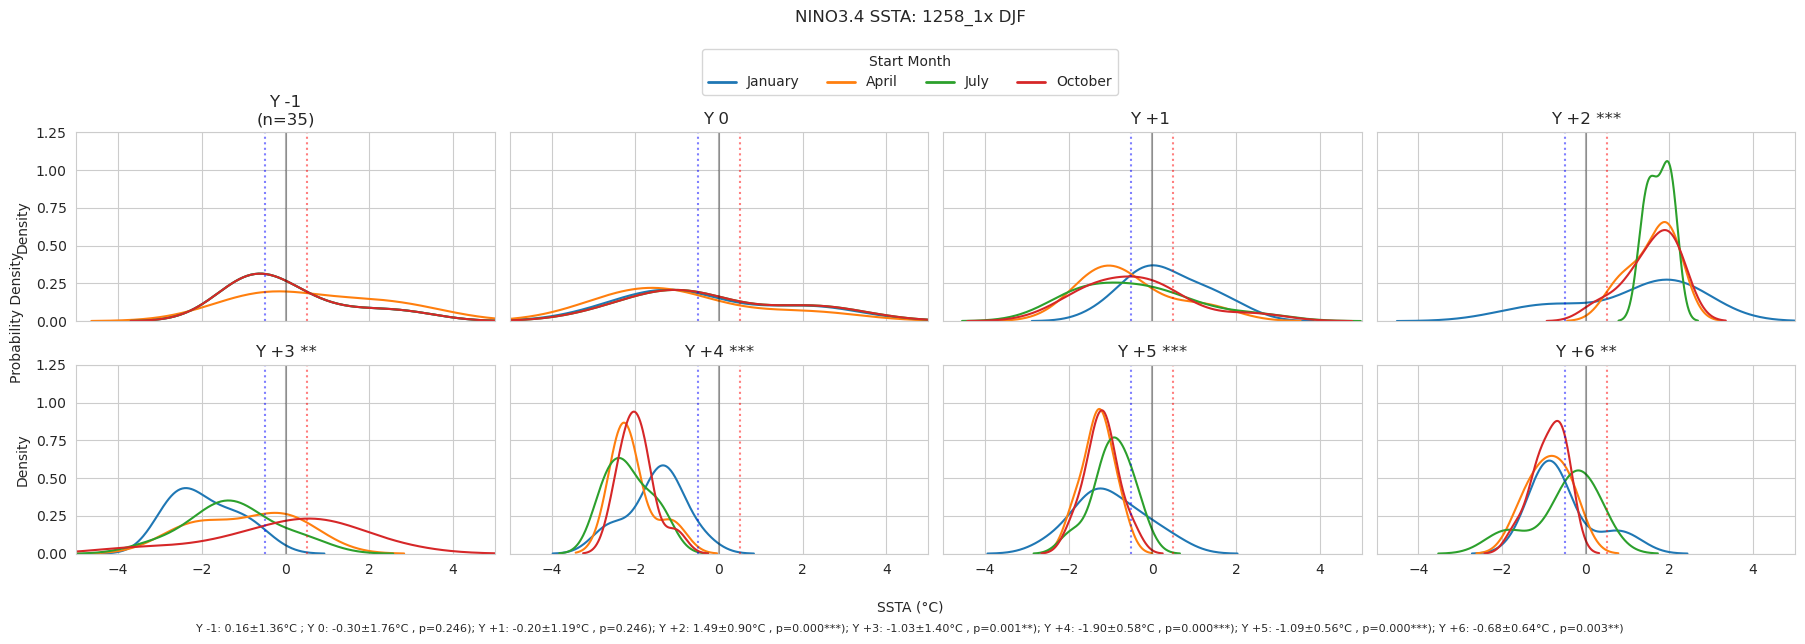

In [65]:
fig = plot_yearly_kde_panel(
    jan_nino34, apr_nino34, july_nino34, oct_nino34, eruption_year=1258
)
plt.show() 

In [75]:
import math
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import xarray as xr
from matplotlib.lines import Line2D
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests


MONTH_COLORS = {
    "January": "tab:blue",
    "April": "tab:orange",
    "July": "tab:green",
    "October": "tab:red",
}

sns.set_style("whitegrid")


def _p_to_star(p: float) -> str:
    if p < 0.001:
        return "***"
    if p < 0.01:
        return "**"
    if p < 0.05:
        return "*"
    return ""


def plot_yearly_kde_panel(
    jan_nino34: xr.DataArray,
    apr_nino34: xr.DataArray,
    july_nino34: xr.DataArray,
    oct_nino34: xr.DataArray,
    eruption_year: int = 1258,
) -> plt.Figure:
) -> tuple[plt.Figure, pd.DataFrame]:
    """Plot DJF-season KDEs for four start-month ensembles.

    One subplot is created for each year relative to ``eruption_year``
    (from Y-1 through Y+6). Within each subplot the December–February mean
    NINO3.4 anomaly distributions of the January, April, July, and October start
    months are shown as four KDE curves. Each panel title lists the number
    of contributing members and a caption summarises per-year ensemble
    statistics (mean ± standard deviation).

    Parameters
    ----------
    jan_nino34, apr_nino34, july_nino34, oct_nino34 : xarray.DataArray
        NINO3.4 anomaly ensembles with dimensions ``(member, time)``.
    eruption_year : int, optional
        Reference year for the eruption (default 1258).

    Returns
    -------
    matplotlib.figure.Figure
        The resulting panel figure.
    pandas.DataFrame
        Tabular summary with rows for each year and start month. Columns
        include ``year``, ``start_month``, ``n``, ``mean``, ``std``, and
        any ``p_adj`` and significance marks.
    """

    start_months = OrderedDict(
        (
            ("January", jan_nino34),
            ("April", apr_nino34),
            ("July", july_nino34),
            ("October", oct_nino34),
        )
    )

    years = OrderedDict(
        (
            ("Y -1", eruption_year - 1),
            ("Y 0", eruption_year),
            ("Y +1", eruption_year + 1),
            ("Y +2", eruption_year + 2),
            ("Y +3", eruption_year + 3),
            ("Y +4", eruption_year + 4),
            ("Y +5", eruption_year + 5),
            ("Y +6", eruption_year + 6),
        )
    )

    n_years = len(years)
@@ -137,77 +142,97 @@ def plot_yearly_kde_panel(
                "std": float(np.std(year_vals, ddof=1)),
            }
            axes_dict[yr_label] = ax
            if yr_label == "Y -1":
                baseline_vals = year_vals.copy()
            elif baseline_vals is not None:
                p = ttest_ind(year_vals, baseline_vals, equal_var=False).pvalue
                year_stats[yr_label]["pval"] = float(p)
                pval_labels.append(yr_label)
                pvals.append(p)
            ax.set_title(f"{yr_label}\n(n={len(year_vals)})")
        else:
            ax.set_title(yr_label)
        ax.set_xlim([-5, 5])
        ax.set_ylim([0, 1.75])

    if pvals:
        _, pvals_adj, _, _ = multipletests(pvals, method="fdr_bh")
        for lbl, p_adj in zip(pval_labels, pvals_adj):
            year_stats[lbl]["p_adj"] = float(p_adj)
            sig = _p_to_star(p_adj)
            year_stats[lbl]["sig"] = sig
            n = year_stats[lbl]["n"]
            axes_dict[lbl].set_title(f"{lbl}\n(n={n}){sig}")

    rows: list[dict[str, float | str]] = []
    for yr in years:
        months = month_stats.get(yr, {})
        yr_info = year_stats.get(yr, {})
        for month_label, stats in months.items():
            row = {
                "year": yr,
                "start_month": month_label,
                "n": stats["n"],
                "mean": stats["mean"],
                "std": stats["std"],
            }
            if "p_adj" in yr_info:
                row["p_adj"] = yr_info["p_adj"]
                row["sig"] = yr_info["sig"]
            rows.append(row)
    stats_df = pd.DataFrame(
        rows, columns=["year", "start_month", "n", "mean", "std", "p_adj", "sig"]
    )

    # Hide any unused axes
    for ax in axes[n_years:]:
        ax.set_visible(False)

    handles = [
        Line2D([0], [0], color=MONTH_COLORS[label], lw=2, label=label)
        for label in start_months
    ]
    fig.legend(
        handles=handles,
        loc="upper center",
        ncol=len(start_months),
        title="Start Month",
        bbox_to_anchor=(0.5, 0.93),
    )

    fig.text(0.5, 0.04, "DJF NINO3.4 Anomaly (°C)", ha="center")
    fig.text(0.04, 0.5, "Probability Density", va="center", rotation="vertical")

    # dynamic title
    fig.suptitle(
        f"DJF NINO3.4 Distributions Relative to {eruption_year}", y=0.98
    )

    # caption with per-year and per-month statistics
    if year_stats:
        caption_parts: list[str] = []
        for yr in years:
            if yr not in month_stats:
                continue
            s = year_stats.get(yr, {})
            months = month_stats.get(yr, {})
            month_parts = [
                f"{m[:3]} {v['mean']:.2f}±{v['std']:.2f}°C (n={v['n']})"
                for m, v in months.items()
            ]
            month_str = ", ".join(month_parts)
            if "p_adj" in s:
                caption_parts.append(
                    f"{yr}: {month_str}; p={s['p_adj']:.3f}{s['sig']}"
                )
            else:
                caption_parts.append(f"{yr}: {month_str}")
        caption = "; ".join(caption_parts)
        fig.text(0.5, 0.005, caption, ha="center", va="bottom", fontsize=8)

    fig.tight_layout(rect=[0, 0.07, 1, 0.92])
    return fig
    return fig, stats_df

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 75)

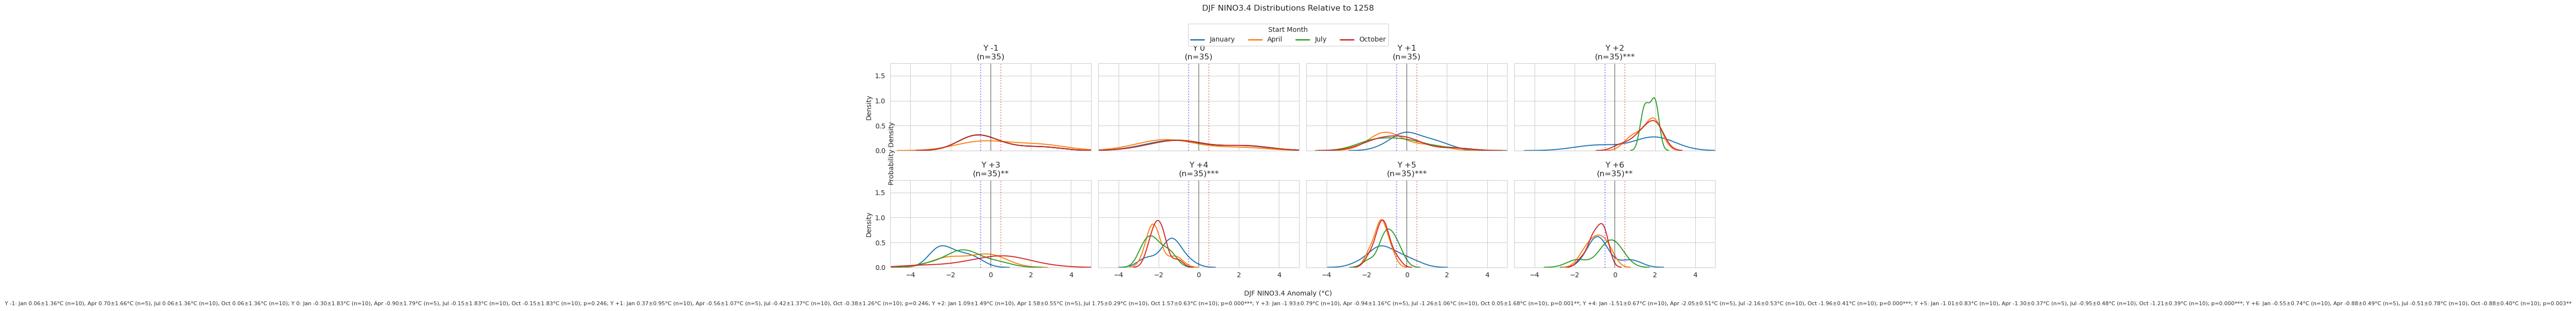

In [69]:
fig = plot_yearly_kde_panel(
    jan_nino34, apr_nino34, july_nino34, oct_nino34, eruption_year=1258
)
plt.show() 

In [40]:
import numpy as np
import xarray as xr
import cftime

def select_events(tos, regbox, enso_threshold=1.0):
    """
    Selects El Niño and La Niña years for each ensemble member.
    Automatically identifies the start and end of the dataset.
    
    Args:
        tos (xarray.DataArray): SST data (detrended but not anomalies).
        regbox (list): Region of interest for SST analysis [lat_min, lat_max, lon_min, lon_max].
        enso_threshold (float): Threshold for identifying ENSO events (default: 1.0 standard deviation).
    
    Returns:
        ninoyrs_mem (xarray.DataArray): El Niño years for each ensemble member.
        ninayrs_mem (xarray.DataArray): La Niña years for each ensemble member.
        ens_n34 (xarray.DataArray): SST data for the NINO3.4 region.
    """
    print("Starting select_events...")
    
    # Ensure the 'time' dimension is in cftime format
    if not isinstance(tos['time'].values[0], cftime.datetime):
        raise TypeError("The 'time' dimension must use cftime.datetime objects.")
    
    # Automatically determine the start and end of the dataset
    start_time = tos['time'].min().values
    end_time = tos['time'].max().values
    timespi = [start_time, end_time]
    
    # Extract years from the first and last time values
    strt = tos['time'].dt.year.min().item()  # Start year
    fin = tos['time'].dt.year.max().item()   # End year
    
   # print(f"Dataset time range: {start_time} to {end_time}")
   # print(f"Analysis years: {strt} to {fin}")
    
    # Isolate the time period and regions
    print("Isolating NINO3.4 region and overall region...")
    ens_n34 = tos.sel(lat=slice(regbox[0], regbox[1]), lon=slice(regbox[2], regbox[3]), time=slice(timespi[0], timespi[1]))
                                                                                                   
    # Compute DJF seasonal averages
    print("Computing seasonal DJF averages.")
    tmpdjf = ens_n34.resample(time='QS-DEC').mean(dim="time")
    tmpdjf = tmpdjf.where(tmpdjf.time.dt.month == 12, drop=True)
    ens_n34_djf = tmpdjf
    
    # Identify ENSO events based on standard deviation threshold
    print("Identifying ENSO events.")
    tmpn34std = ens_n34_djf.std('time')  # Standard deviation of SST anomalies
    msk_en = ens_n34_djf > enso_threshold * tmpn34std  # El Niño mask
    msk_ln = ens_n34_djf < -enso_threshold * tmpn34std  # La Niña mask
    
    yrrange = np.arange(strt, fin + 1, 1)  # Include the end year
    
    # Process El Niño years
    enyrs_per = []
    for i in range(len(msk_en.member)):
        A = msk_en.isel(member=i).mean('lat').mean('lon')
        # Ensure A and yrrange have the same length
        if len(A) != len(yrrange):
            #print(f"Adjusting yrrange to match the length of A: {len(A)}")
            yrrange_adjusted = yrrange[:len(A)]  # Adjust yrrange to match A's length
        else:
            yrrange_adjusted = yrrange
        fut = xr.where(A, yrrange_adjusted, np.nan)
        enyrs_per.append(fut)
    ninoyrs_mem = xr.DataArray(np.stack(enyrs_per, axis=0), dims=["member", "time"])
    
    # Process La Niña years
    lnyrs_per = []
    for i in range(len(msk_ln.member)):
        B = msk_ln.isel(member=i).mean('lat').mean('lon')
        # Ensure B and yrrange have the same length
        if len(B) != len(yrrange):
            #print(f"Adjusting yrrange to match the length of B: {len(B)}")
            yrrange_adjusted = yrrange[:len(B)]  # Adjust yrrange to match B's length
        else:
            yrrange_adjusted = yrrange
        futln = xr.where(B, yrrange_adjusted, np.nan)
        lnyrs_per.append(futln)
    ninayrs_mem = xr.DataArray(np.stack(lnyrs_per, axis=0), dims=["member", "time"])
    
    print("select_events completed.")
    return ninoyrs_mem, ninayrs_mem, ens_n34

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.patches import Rectangle

def plot_enso_heatmap(temperature_data, ninoyrs_mem, ninayrs_mem, titleforcing):
    """
    Plot a heatmap of temperature anomalies with symbols for El Niño and La Niña events.
    
    Args:
        temperature_data (xarray.DataArray): Temperature anomaly data (member, time, lat, lon).
        ninoyrs_mem (xarray.DataArray): El Niño years for each ensemble member.
        ninayrs_mem (xarray.DataArray): La Niña years for each ensemble member.
        titleforcing (str): Title for the plot.
    """
    # Convert DataArrays to numpy arrays
    en_years = ninoyrs_mem.values  # El Niño years (NaN for non-event years)
    ln_years = ninayrs_mem.values  # La Niña years (NaN for non-event years)
    
    # Compute mean temperature anomalies over lat/lon for each member and time
    temp_anomalies = temperature_data.mean(dim=['lat', 'lon']).values  # Shape: (member, time)
    
    # Get time and member dimensions
    members = np.arange(1, temp_anomalies.shape[0] + 1)  # Member numbers (1 to N)
    times = temperature_data['time'].values  # Array of datetime64 values
    months = temperature_data['time.month'].values  # Array of months
    years = temperature_data['time.year'].values  # Array of years
    
    # Calculate the total number of months
    num_months = len(times)  # Total number of time steps (months)
    
    # Create the heatmap
    fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
    
    # Plot temperature anomalies
    cax = ax.imshow(temp_anomalies, cmap='bwr', vmin = -3, vmax = 3,aspect='auto', origin='lower',
                    extent=[0, num_months - 1, 0.5, len(members) + 0.5])
    
    # Add colorbar for temperature anomalies
    cbar = plt.colorbar(cax, orientation='vertical', pad=0.02)
    cbar.set_label('Temperature Anomaly (°C)', fontsize=12)
    
    # Overlay symbols for El Niño and La Niña events
    for i in range(len(members)):
        for j in range(en_years.shape[1]):  # Use the number of years in en_years
            if not np.isnan(en_years[i, j]):  # El Niño event
                ax.text(j * 12 + 1.5, i + 1, 'E', color='darkred', fontsize=20, ha='center', va='center', fontweight='bold')
            if not np.isnan(ln_years[i, j]):  # La Niña event
                ax.text(j * 12 + 1.5, i + 1, 'L', color='navy', fontsize=20, ha='center', va='center', fontweight='bold')
    
    # Customize the plot
    # Set minor x-axis ticks for each month (top level)
    month_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
    ax.set_xticks(np.arange(num_months))
    ax.set_xticklabels([month_labels[month - 1] for month in months], fontsize=5, ha="center", rotation=0, style='normal')
    
    # Add a secondary x-axis for years (bottom level)
    ax2 = ax.twiny()  # Create a secondary x-axis
    
    # Find the positions of the first month (January) of each year
    january_indices = np.where(months == 1)[0]  # Indices of January months
    january_years = years[january_indices]  # Years corresponding to January months
    
    # Set ticks and labels for the secondary x-axis
    ax2.set_xticks(january_indices + 0.5)  # Center the ticks on January
    ax2.set_xticklabels([str(year) for year in january_years], fontsize=10, ha="center")
    
    ax2.set_xlim(ax.get_xlim())  # Align the secondary x-axis with the primary x-axis
    
    # Ensure the first and last minor ticks are visible
    ax.set_xlim(-0.5, num_months - 0.5)  # Extend x-axis limits slightly
    
    # Set y-axis ticks and labels
    ax.set_yticks(np.arange(1, len(members) + 1))
    ax.set_yticklabels(members, fontsize=10)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Ensemble Member', fontsize=12)
    ax.set_title(f'{titleforcing}  Temperature Anomalies with El Niño and La Niña Events', fontsize=14, pad=20)
    
    # Add gridlines
   # ax.grid(which='major', color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.grid(which='minor', color='gray', linestyle=':', linewidth=0.5, alpha=0.5)
    
    # Add a box around each DJF (December, January, February) season
    for j in range(len(january_indices)):
        if j == 0:  # Handle the first year separately
            # Check if December of the previous year exists in the dataset
            if january_indices[j] > 0 and months[january_indices[j] - 1] == 12:  # December exists
                dec_start = january_indices[j] - 1  # December is the month before January
                jan_start = january_indices[j]
                feb_end = jan_start + 1  # February is 2 months after January
                
                # Draw a single box around DJF
                ax.add_patch(Rectangle((dec_start, 0.5), feb_end - dec_start + 1, len(members),
                             edgecolor='black', fill=False, linewidth=2))
            else:
                # If December of the previous year is not available, draw a box around JF (January and February)
                jan_start = january_indices[j]
                feb_end = jan_start + 1  # February is 2 months after January
                
                # Draw a single box around JF
                ax.add_patch(Rectangle((jan_start, 0.5), feb_end - jan_start + 1, len(members),
                             edgecolor='black', fill=False, linewidth=2))
        else:
            # December of the previous year
            dec_start = january_indices[j - 1] + 11  # December is 11 months after January of the previous year
            # January and February of the current year
            jan_start = january_indices[j]
            feb_end = jan_start + 1  # February is 2 months after January
            
            # Draw a single box around DJF
            ax.add_patch(Rectangle((dec_start, 0.5), feb_end - dec_start + 1, len(members),
                         edgecolor='black', fill=False, linewidth=2))
    
    # Save the figure
    plt.savefig(f'{titleforcing}_enso_events_heatmap_with_temperature.png', dpi=300, bbox_inches='tight')
    plt.show()

In [42]:
def plot_mem_heatmap(data_clim, regbox, titleforcing):
    ninoyrs_mem, ninayrs_mem, data_djf= select_events(data_clim, regbox)
    plot_enso_heatmap(data_djf,ninoyrs_mem, ninayrs_mem, titleforcing)
    return  data_djf, ninoyrs_mem, ninayrs_mem,

Starting select_events...
Isolating NINO3.4 region and overall region...
Computing seasonal DJF averages.
Identifying ENSO events.
select_events completed.


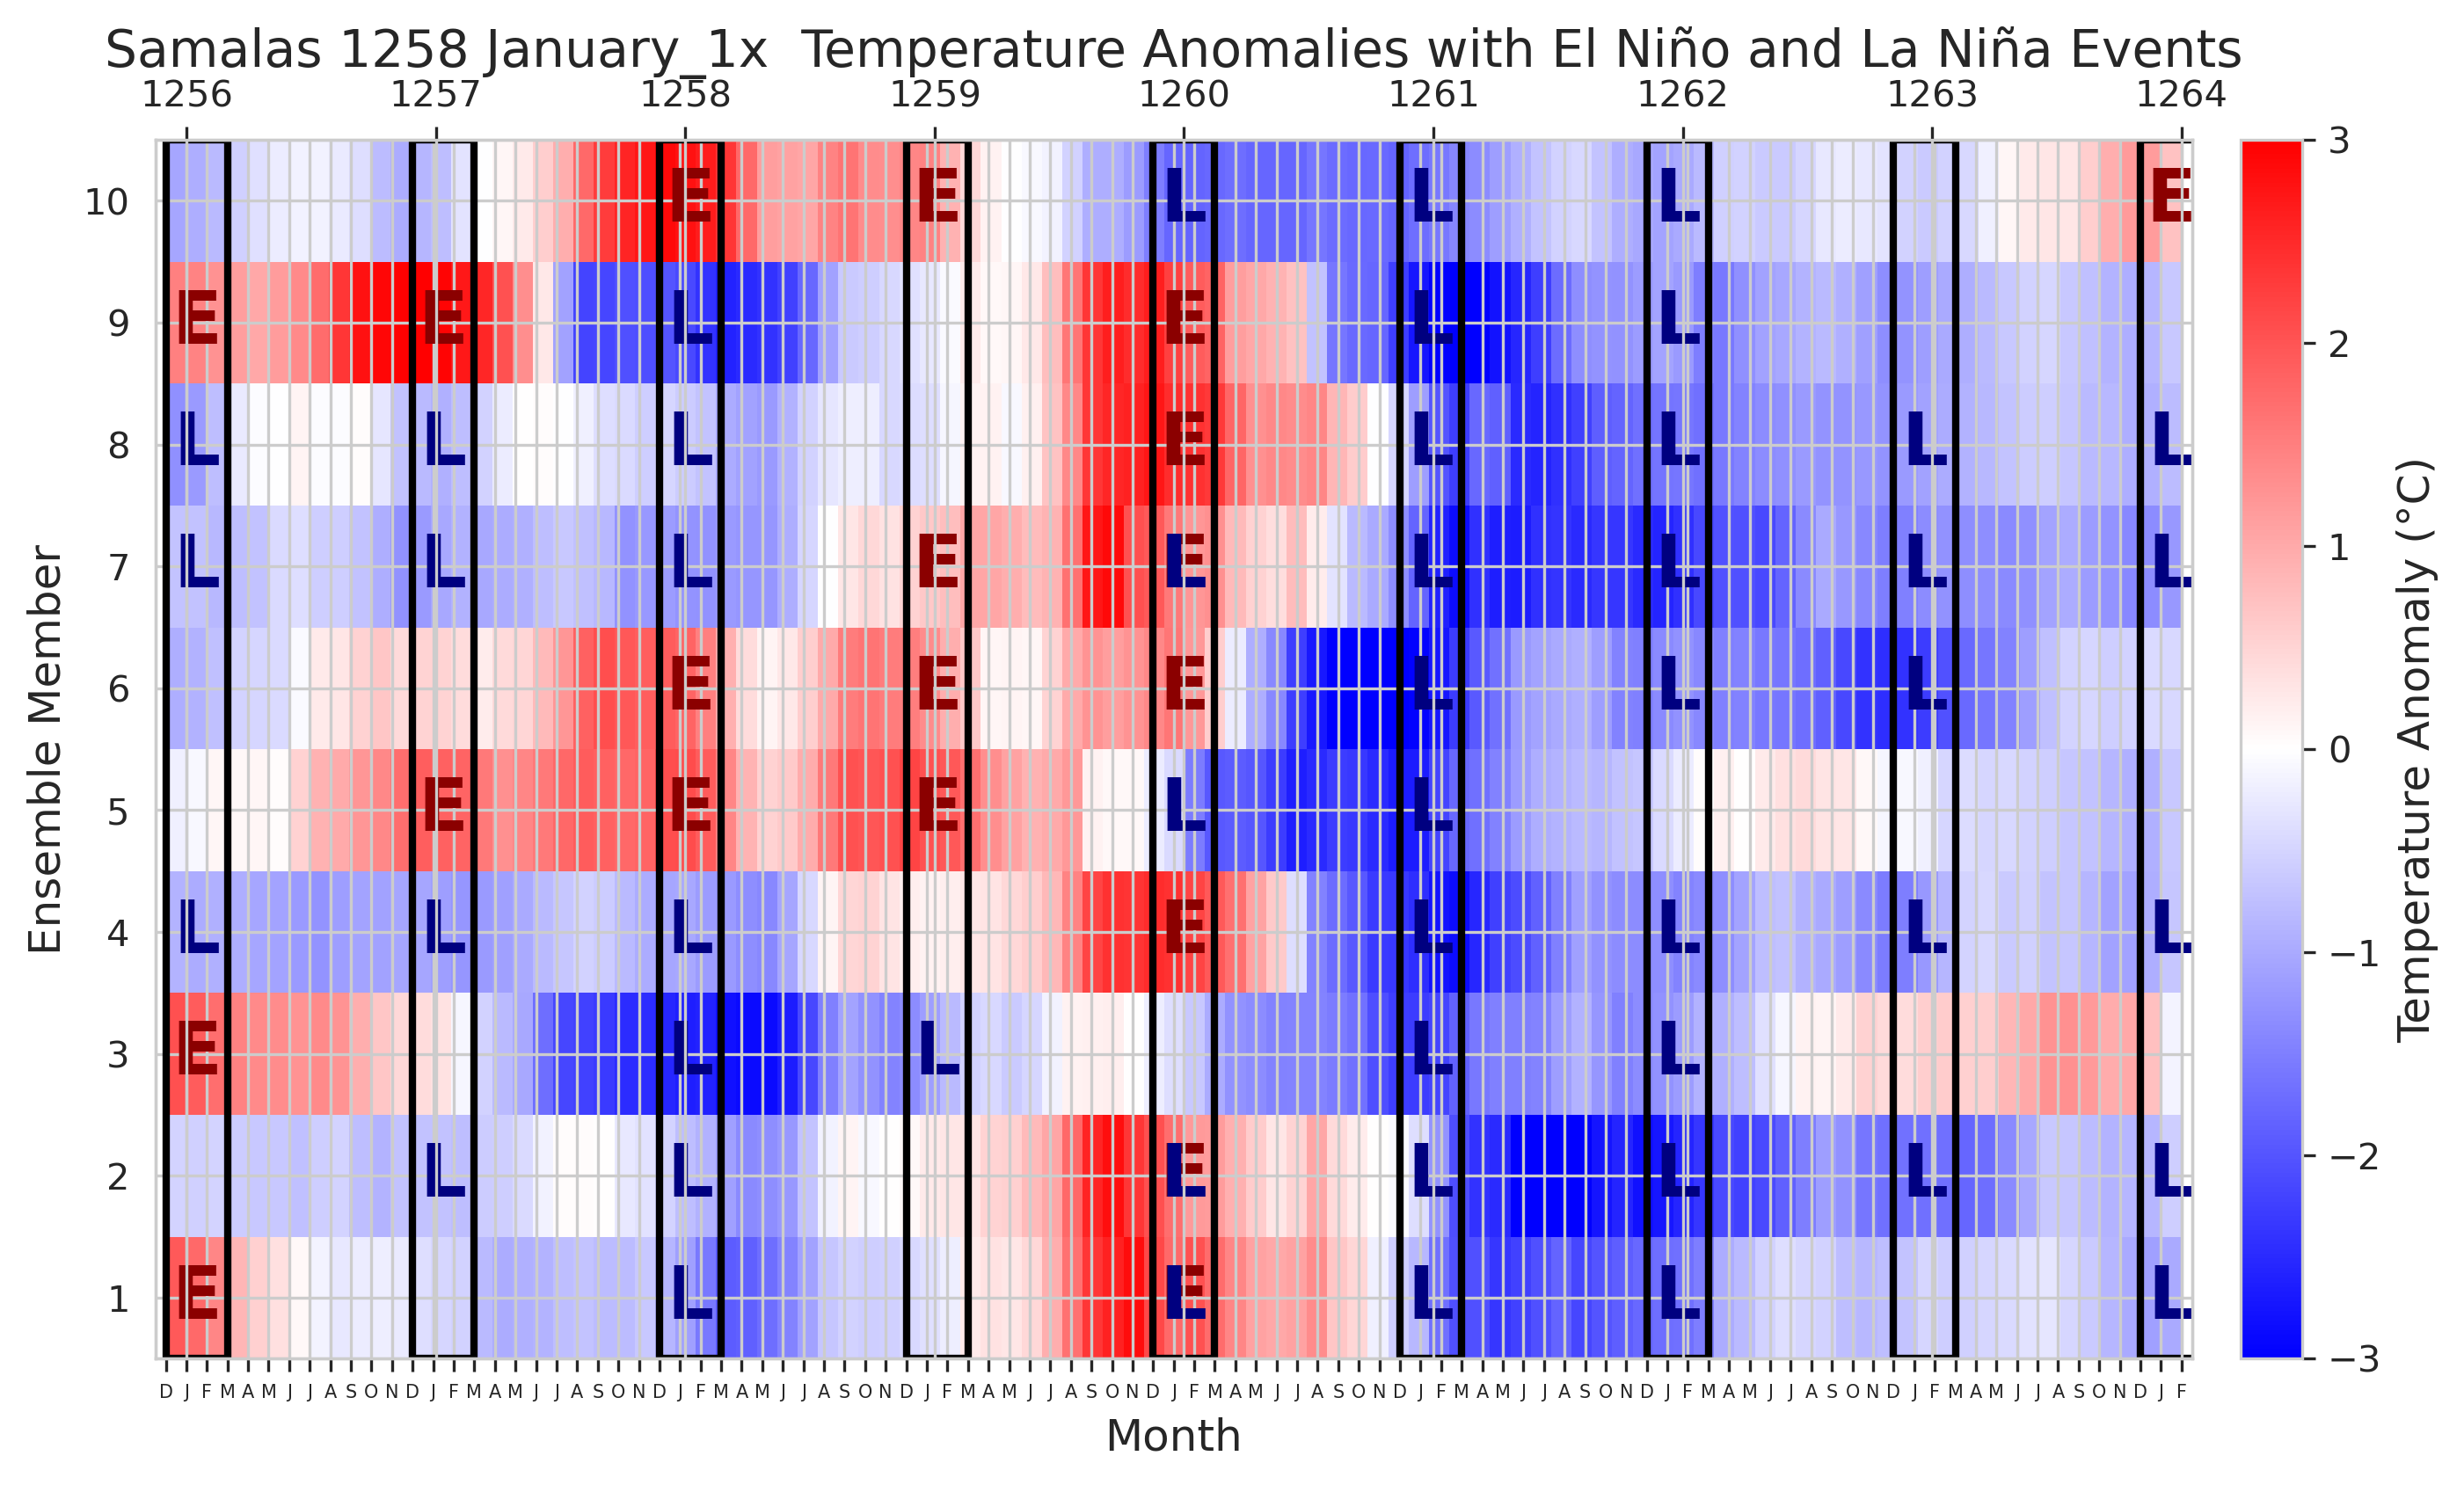

In [43]:
djf_ja, ninoyr_ja, ninayr_ja =plot_mem_heatmap(jananom, regbox, "Samalas 1258 January_1x")

Starting select_events...
Isolating NINO3.4 region and overall region...
Computing seasonal DJF averages.
Identifying ENSO events.
select_events completed.


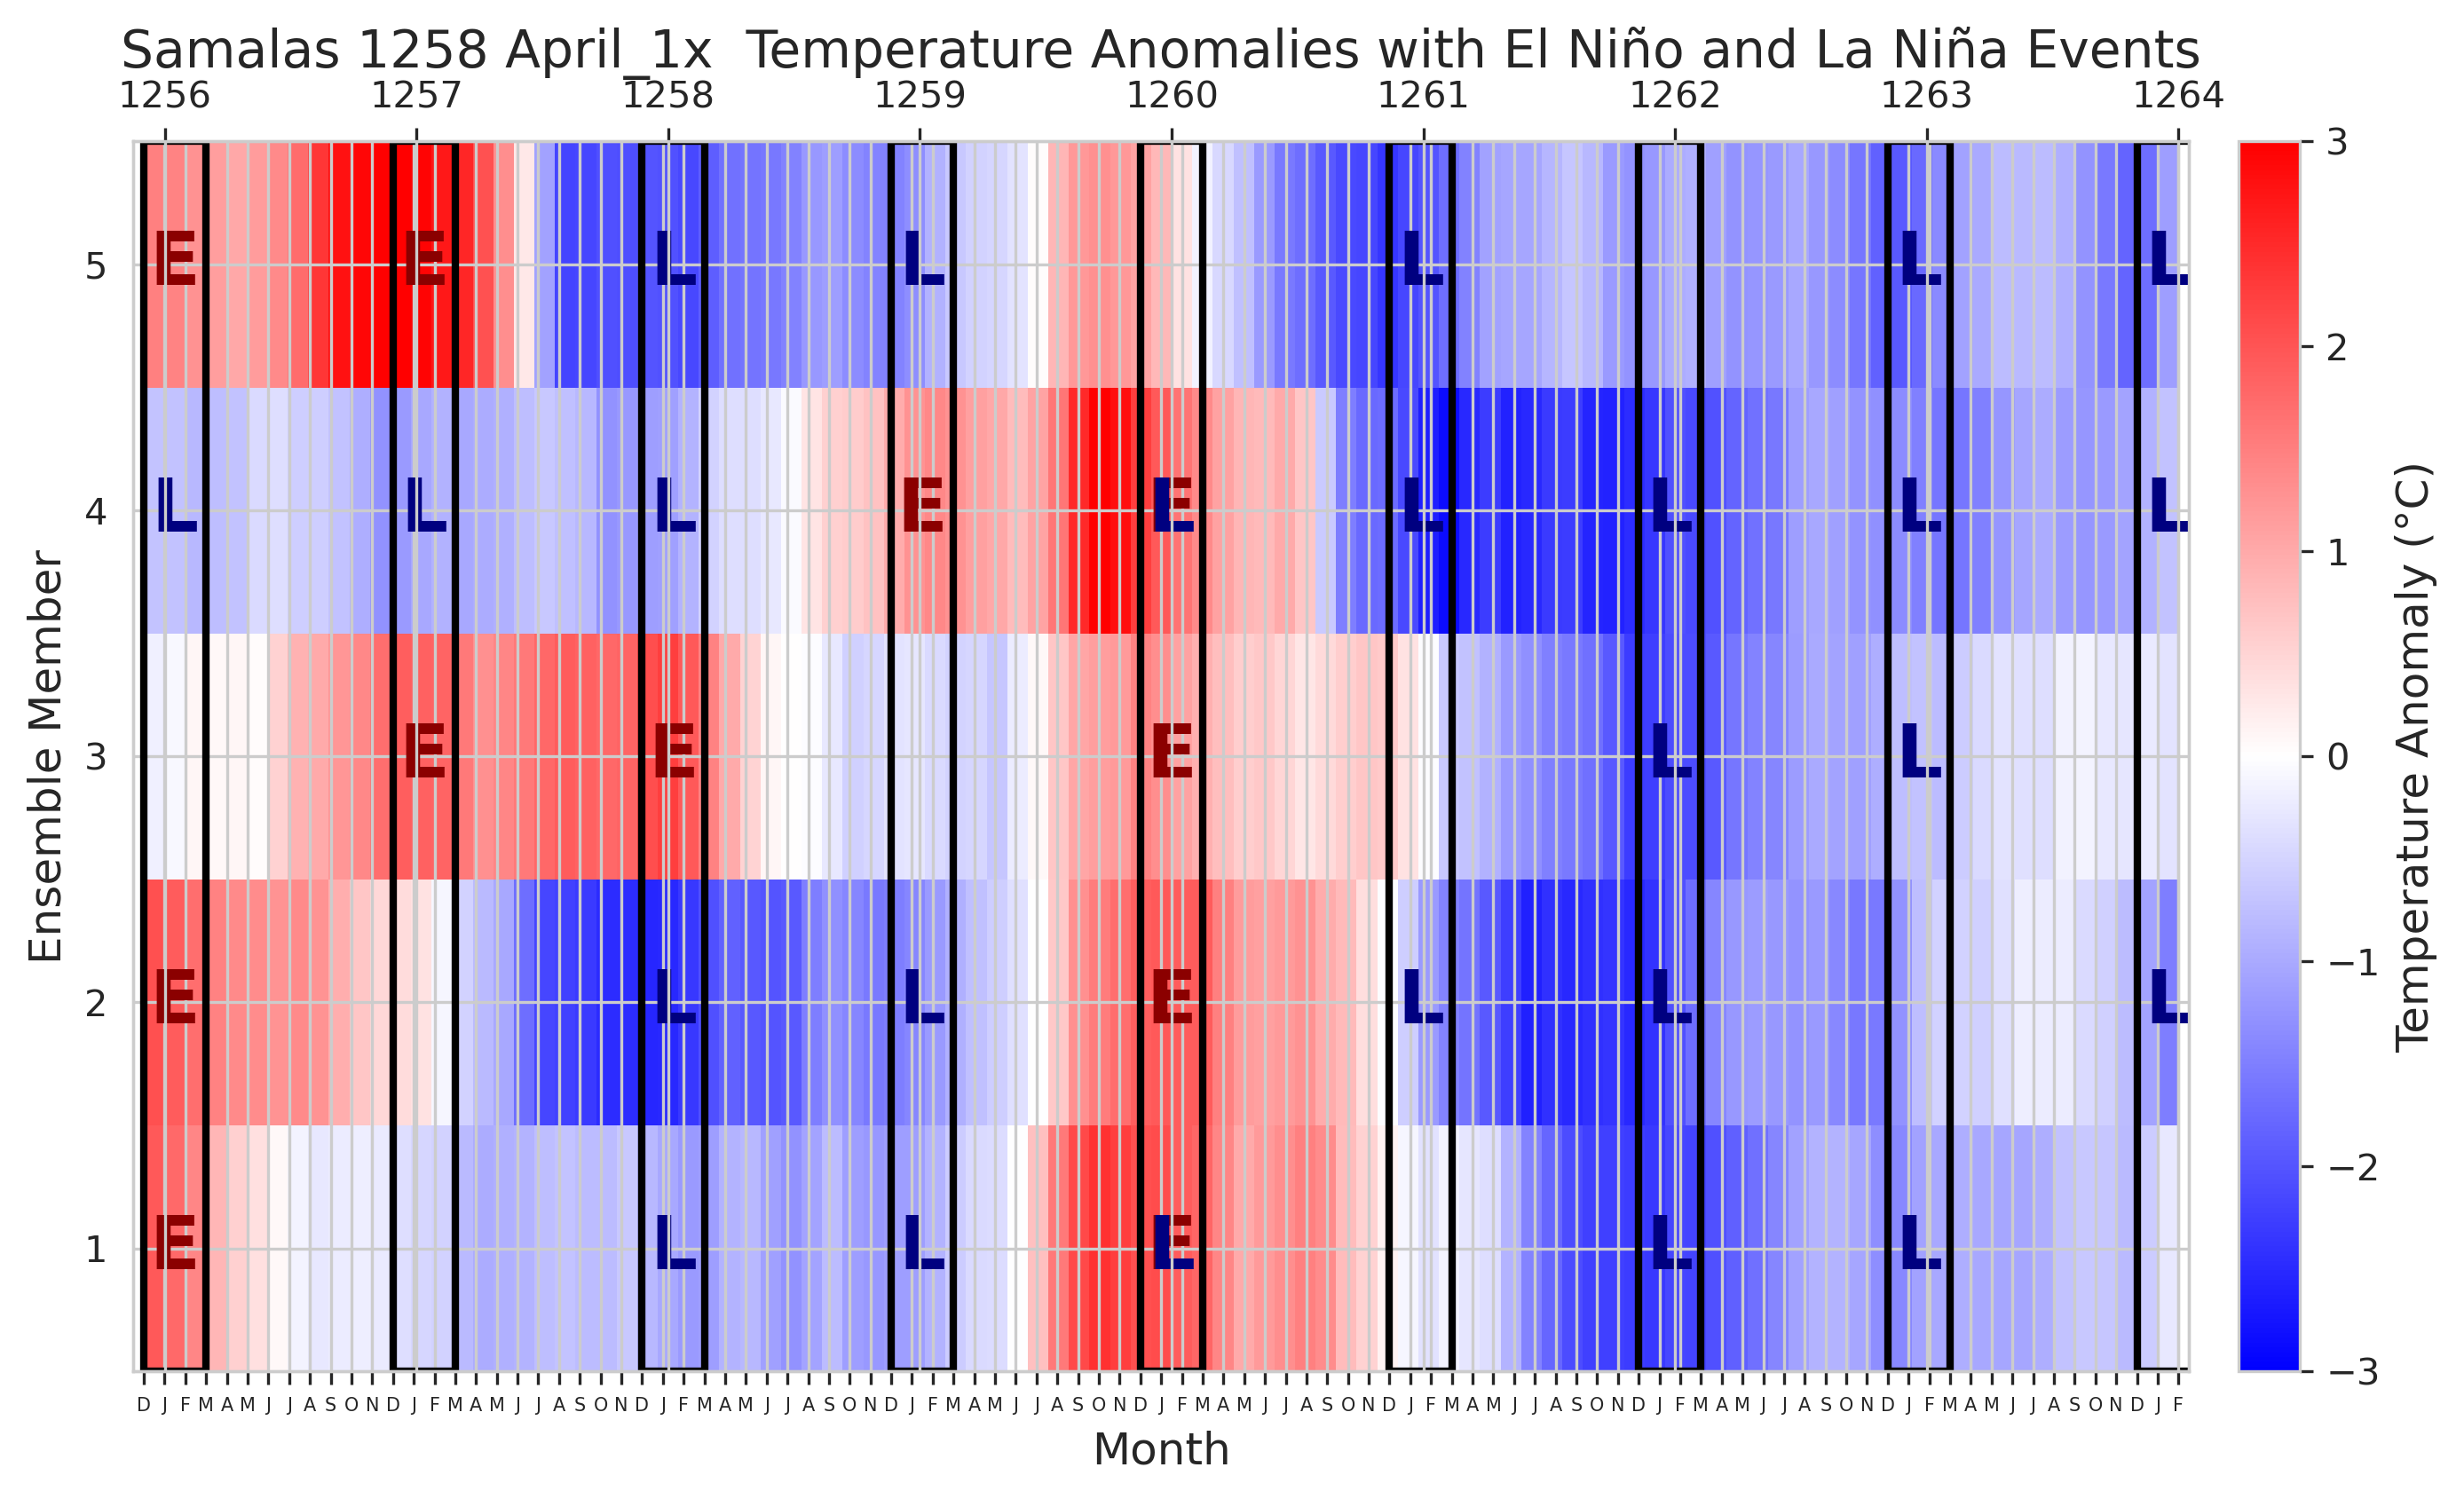

In [44]:
djf_a, ninoyr_a, ninayr_a =plot_mem_heatmap(apranom, regbox, "Samalas 1258 April_1x")

In [ ]:
djf_ju, ninoyr_ju, ninayr_ju =plot_mem_heatmap(julyanom, regbox, "Samalas 1258 July_1x")

In [ ]:
djf_o, ninoyr_o, ninayr_o =plot_mem_heatmap(octanom, regbox, "Samalas 1258 October_1x")

In [ ]:
def reg_avg(r):
    ds = []
    for i in range(len(r)):
        reg_box = r[i].sel(lat=slice(-5,5), lon=slice(190,240))  
        avg_region = reg_box.mean(('lat', 'lon'))
        ds.append(avg_region)
    return ds[:]

In [ ]:
index_list = reg_avg(anom_list)

In [ ]:
dt = 1/12  # In years
t_post = np.arange(0,99)*dt + 1256
year = np.linspace(0,99, 99) 

In [ ]:
def roll_post(r,vp):
    fig = plt.figure(figsize=(25,10))
    for i in range(len(r)):
        #ax = fig.add_subplot(6,1,i+1)
       # rr = r[i].sel(time = slice('1257-01-01','1264-12-01'))
        #print(len(rr[0]))
        tseries = r[i].mean(dim = 'member')
        bres = stats.linregress(t_post,tseries)
        plt.suptitle(vp , fontsize = 35, y= 1)
        #plt.set_ylim([-2,.2]) #ax
        plt.ylim(-4,4)
        plt.plot(t_post,tseries, label = var_name[i], color = colors[i], linewidth=4)
        #plt.plot(t_post, (bres.intercept + bres.slope*t_post), 'r', linewidth=3)
        plt.fill_between(t_post,tseries + tseries.std(),
                         tseries - tseries.std(), edgecolor= colors_ribbon[i], 
                         facecolor=colors_ribbon[i], alpha=0.5)
        plt.ylabel(plt_ylabel)
        plt.xlabel('Year')
        plt.rcParams['font.family']= 'sans-serif'
        plt.rcParams['font.size'] = '30'
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=4)
        #plt.tight_layout()
        plt.xlabel('Year', fontsize = '38')
        #plt.xticks(np.linspace(1850, 2005, 10))
        #plt.xticks(ticks=True, labels=None,  minor=True)
        plt.axhline(y=0.5, color='grey', linestyle='dotted', lw=4)
        plt.axhline(y=-0.5, color='grey', linestyle='dotted', lw=4)
        plt.axvline(x = 1258,color='b', linestyle='--', lw=3)
        plt.axvline(x = 1258.25,color='k', linestyle='--', lw=3)
        plt.axvline(x = 1258.5,color='r', linestyle='--', lw=3)
        plt.axvline(x = 1258.75,color='g', linestyle='--', lw=3)
        plt.savefig(variable + "ts10.jpg")

In [ ]:
#for i in range(len(pwc_in)):
vp =  'Nino3.4 SSTA 1258_1x'
roll_post(index_list, vp)

In [ ]:
def season_pre(mm):
    djf =[]
    jja = []
    for i in range(len(mm)):
        m = mm[i].sel(time = slice('1256-12-01','1257-12-01'))
        DA_DJF = m.sel(time=m.time.dt.season=="DJF")
        DA_JJA = m.sel(time=m.time.dt.season=="JJA")
        djf.append(DA_DJF)
        jja.append(DA_JJA)
    return djf, jja

In [ ]:
def season_y0(mm):
    djf =[]
    jja = []
    for i in range(len(mm)):
        m = mm[i].sel(time = slice('1258-01-01','1259-02-01')) #Y+0 DJF
        DA_DJF = m.sel(time=m.time.dt.season=="DJF")
        DA_JJA = m.sel(time=m.time.dt.season=="JJA")
        djf.append(DA_DJF)
        jja.append(DA_JJA)
    return djf, jja

In [ ]:
def season_y12(mm):
    djf =[]
    jja = []
    for i in range(len(mm)):
        m = mm[i].sel(time = slice('1259-03-01','1261-02-01'))
        DA_DJF = m.sel(time=m.time.dt.season=="DJF")
        DA_JJA = m.sel(time=m.time.dt.season=="JJA")
        djf.append(DA_DJF)
        jja.append(DA_JJA)
    return djf, jja

In [ ]:
def season_y36(mm):
    djf =[]
    jja = []
    for i in range(len(mm)):
        m = mm[i].sel(time = slice('1261-03-01','1264-03-01'))
        DA_DJF = m.sel(time=m.time.dt.season=="DJF")
        DA_JJA = m.sel(time=m.time.dt.season=="JJA")
        djf.append(DA_DJF)
        jja.append(DA_JJA)
    return djf, jja

In [ ]:
djfp, jjap = season_pre(anom_list)
djf0, jja0 = season_y0(anom_list)
djf02, jja02 = season_y12(anom_list)
djf36, jja36 = season_y36(anom_list)

In [ ]:
def msplot(zz, vp):
    fig = plt.figure(figsize=(20,10))
    fig.dpi = 600
    clevs = np.arange(-1.05, 1.05, 0.05)
    dx = []
    for i in np.arange(len(zz)):
        zzz = zz[i].mean(dim = 'time')
        ep = zzz.mean(dim = 'member')
        ax = plt.subplot(1, 4, i+1, projection=ccrs.PlateCarree(central_longitude=-179.5))
        ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree(central_longitude=-179.5))
        cf = ax.pcolormesh(lon, lat, ep, transform=ccrs.PlateCarree(),cmap='seismic',
                           vmin = -3, vmax =3)

        ax.coastlines(linewidths=1.0)
        ax.set_aspect('equal')
        ax.set_extent([75, 290, -31, 31], crs=ccrs.PlateCarree())
        fig.suptitle(variable +vp , fontsize = 25, y= 0.70)
        ax.set_title( var_name[i] ,fontsize=14)
        #ax.text(-20,25,'Variance Explained {:.1f} %'.format(vx[i]),fontsize=9,backgroundcolor='white',horizontalalignment="right", verticalalignment ='bottom')
        ## Add in meridian and parallels
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0, color='black', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.left_labels= True
        gl.xlines = False
        gl.ylines = True
        gl.xlocator = mticker.FixedLocator([-90, 180, 90])
        gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 25, 'color': 'gray'}
        gl.xlabel_style = {'size': 12.5,'color': 'black', 'weight': 'bold'}
        gl.ylabel_style = {'size': 25, 'color': 'gray'}
        gl.ylabel_style = {'size': 12.5,'color': 'black', 'weight': 'bold'}
        ax.add_geometries([Wring], ccrs.PlateCarree(), facecolor='none', edgecolor='dimgrey', linewidth =2.5)
        gl.xlabel_style = {'size': 12}
        gl.ylabel_style = {'size': 12}
    # # add colorbar [left, bottom, width, height]
        ax2 = fig.add_axes([0.14, 0.25, 0.75, 0.03])
        cbar = fig.colorbar(cf, cax=ax2, drawedges=False, 
                        orientation='horizontal')#, extend='both')
        cbar.ax.tick_params(labelsize=12)
        cbar.set_label(plt_ylabel, fontsize=12)
        plt.subplots_adjust(hspace=-0.5, wspace=0.85)
        plt.tight_layout()
        plt.savefig(vp +vari + ".anomalies.jpg")

In [ ]:
vp = '\n 1258_1x Y-1: 1256(D) + 1257(JF)'
msplot(djfp, vp)

In [ ]:
vp = '\n 1258_1x Y-1: 1257(JJA)'
msplot(jjap, vp)

In [ ]:
vp = '\n 1258_1x Y+0: 1258(D) + 1259 (JF)'
msplot(djf0, vp)

In [ ]:
vp = '\n 1258_1x Y+0: 1258(JJA)'
msplot(jja0, vp)

In [ ]:
vp = '\n 1258_1x Y+1-2: 1259(D)|1260(JF) + 1260(D)|1261(JF)'
msplot(djf02, vp)

In [ ]:
vp = '\n 1258_1x Y+1-2: 1259(JJA) + 1260(JJA)'
msplot(jja02, vp)

In [ ]:
vp = '\n 1258_1x Y+3-6: 1261(D) - 1264(JF)'
msplot(djf36, vp)

In [ ]:
vp = '\n 1258_1x Y+3-6: 1261(JJA) - 1263(JJA)'
msplot(jja36, vp)